In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <font color='blue'> Predições de Vendas das Lojas ROSSMANN</font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos

# <font color='blue'>1. Contexto</font>

- Reunião mensal de Resultados
- CFO pediu uma Previsão de Vendas das Próximas 6 semanas de cada Loja

# <font color='blue'>2. Desafio</font>

# Problema
- Definição do Budget para a reforma das Lojas

# Causas
- Predição de vendas Atual apresentava muita divergência.
- O processo de Predição de Vendas é baseado em Experiências Passadas.
- Toda à Previsão de Vendas é feita Manuealmente pelas 1115 Lojas da Rossmann.
- A visualização das Vendas é limitada ao Computador.

# Solução
- Usar Machine Learning para realizar a previsão de vendas de todas as lojas
- Visualização das predições de vendas poderão der feitas pelo smartphone.

# <font color='blue'>3. Desenvolvimento da Solução</font>

# DESCRIÇÃO DOS DADOS

In [74]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


## Descriptive Statistics

In [84]:
# Central Tendency - mean, median
num_attributes.describe().T
ct1 = pd.DataFrame(num_attributes.mean()).T
ct2 = pd.DataFrame(num_attributes.median()).T

# Dispersion - sdt, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.std()).T
d2 = pd.DataFrame(num_attributes.min()).T
d3 = pd.DataFrame(num_attributes.max()).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.skew()).T
d6 = pd.DataFrame(num_attributes.kurtosis()).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes     min       max     range         mean  \
0                          store     1.0    1115.0    1114.0   558.429727   
1                    day_of_week     1.0       7.0       6.0     3.998341   
2                          sales     0.0   41551.0   41551.0  5773.818972   
3                      customers     0.0    7388.0    7388.0   633.145946   
4                           open     0.0       1.0       1.0     0.830107   
5                          promo     0.0       1.0       1.0     0.381515   
6                 school_holiday     0.0       1.0       1.0     0.178647   
7           competition_distance    20.0  200000.0  199980.0  5935.442677   
8   competition_open_since_month     1.0      12.0      11.0     6.786849   
9    competition_open_since_year  1900.0    2015.0     115.0  2010.324840   
10                        promo2     0.0       1.0       1.0     0.500564   
11             promo2_since_week     1.0      52.0      51.0    23.619033   
12             promo2_since_year  2009.0    2015.0       6.0  2012.793297   
13                      is_promo     0.0       1.0       1.0     0.155231   

    median           std       skew    kurtosis  
0    558.0    321.908651  -0.000955   -1.200524  
1      4.0      1.997391   0.001593   -1.246873  
2   5744.0   3849.926175   0.641460    1.778375  
3    609.0    464.411734   1.598650    7.091773  
4      1.0      0.375539  -1.758045    1.090723  
5      0.0      0.485759   0.487838   -1.762018  
6      0.0      0.383056   1.677842    0.815154  
7   2330.0  12547.652996  10.242344  147.789712  
8      7.0      3.311087  -0.042076   -1.232607  
9   2012.0      5.515593  -7.235657  124.071304  
10     1.0      0.500000  -0.002255   -1.999999  
11    22.0     14.310064   0.178723   -1.184046  
12  2013.0      1.662658  -0.784436   -0.210075  
13     0.0      0.362125   1.904152    1.625796

# Mapa Mental das Hipóteses

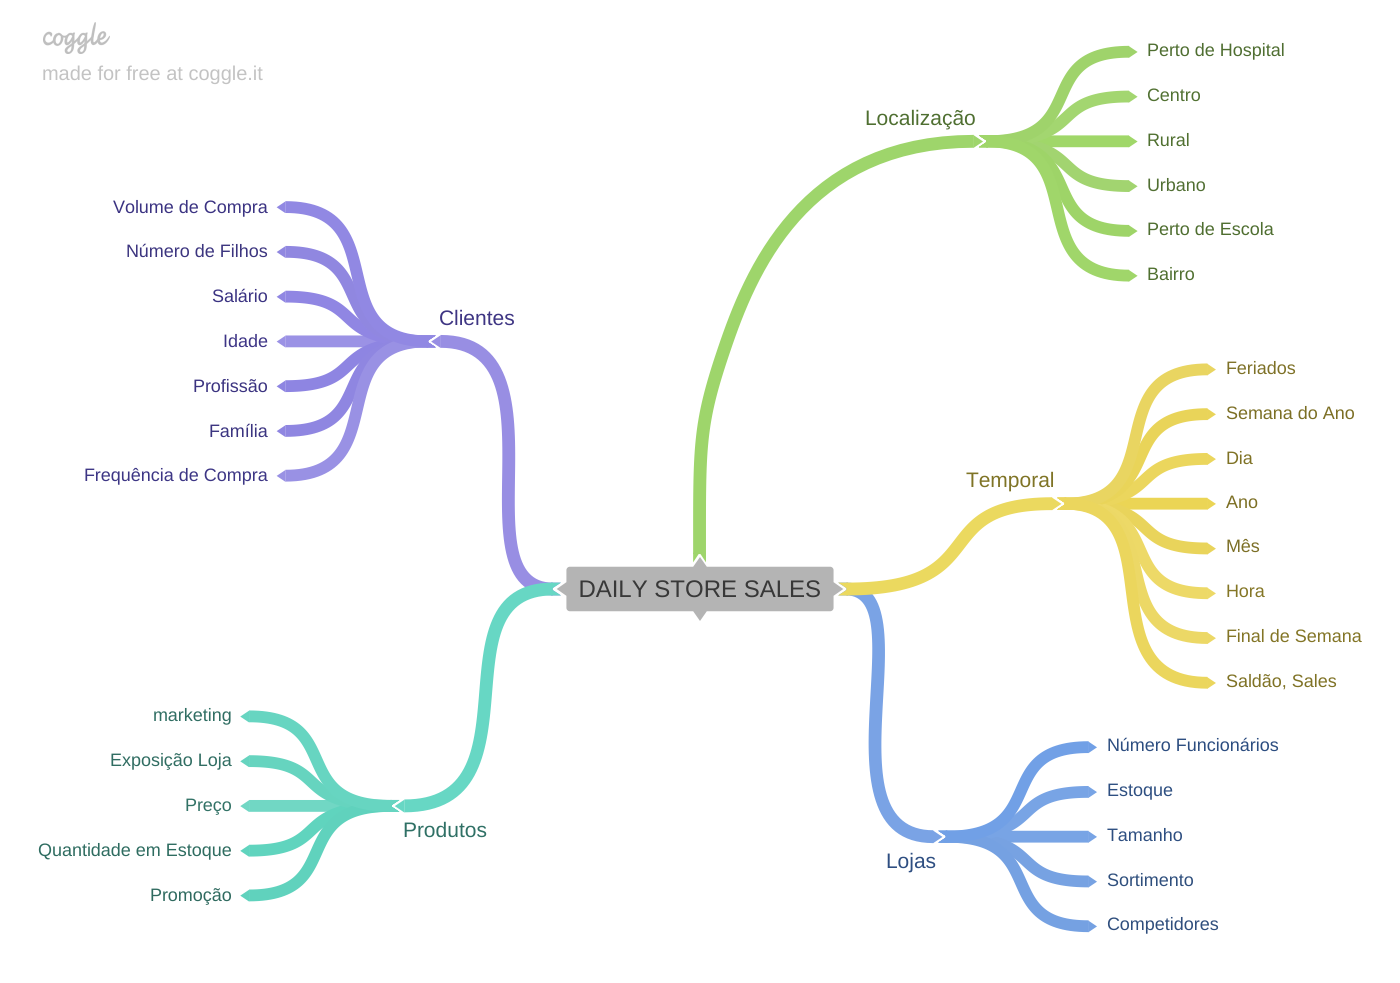

In [88]:
Image('../img/MindMapHypothesis.png')

# Hipóteses da Análise Exploratória

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções dos produtos por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos nos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

# ANÁLISE EXPLORATÓRIA DE DADOS

# Variável Resposta

<AxesSubplot:xlabel='sales', ylabel='Density'>

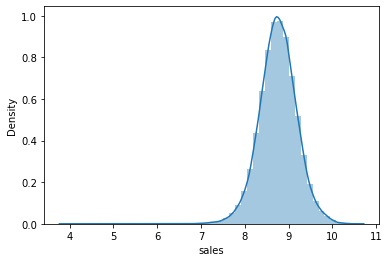

In [96]:
sns.distplot(np.log1p(df4['sales']))

# Variáveis Numéricas

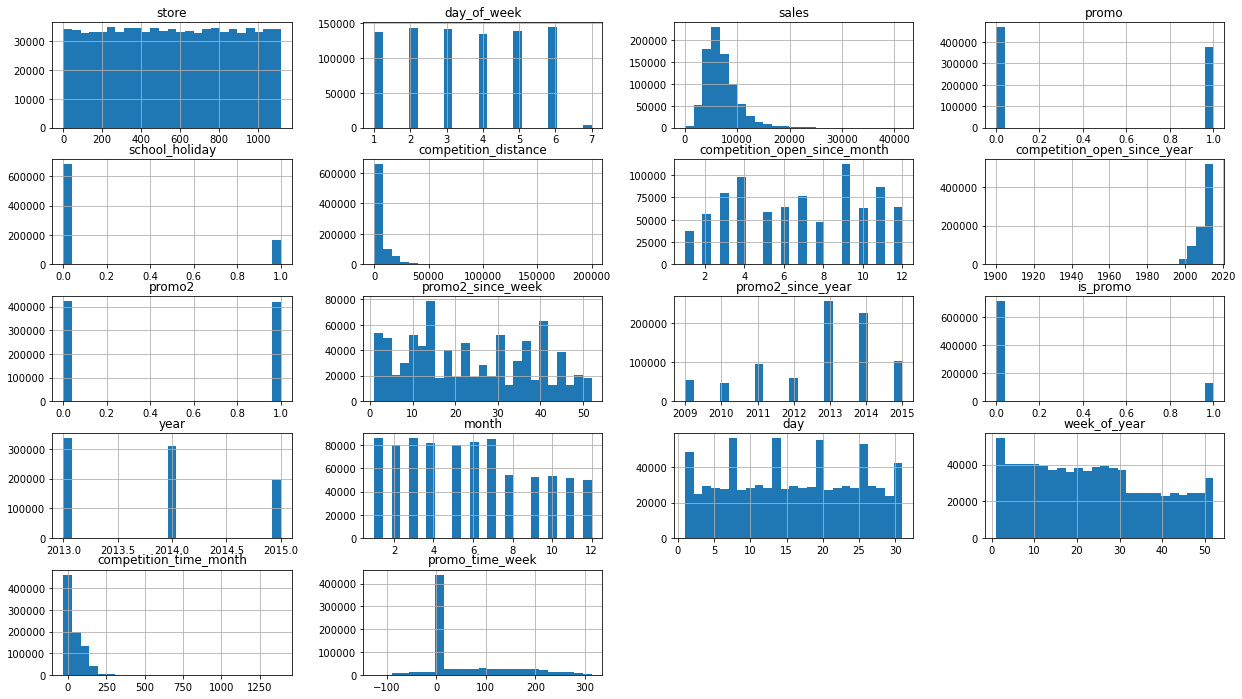

In [97]:
fig = plt.figure(figsize=(21,12));
ax = fig.add_subplot();

num_attributes = df4.select_dtypes(include=['int64', 'float64']);

num_attributes.hist(bins=25, ax=ax);

# Variáveis Categóricas

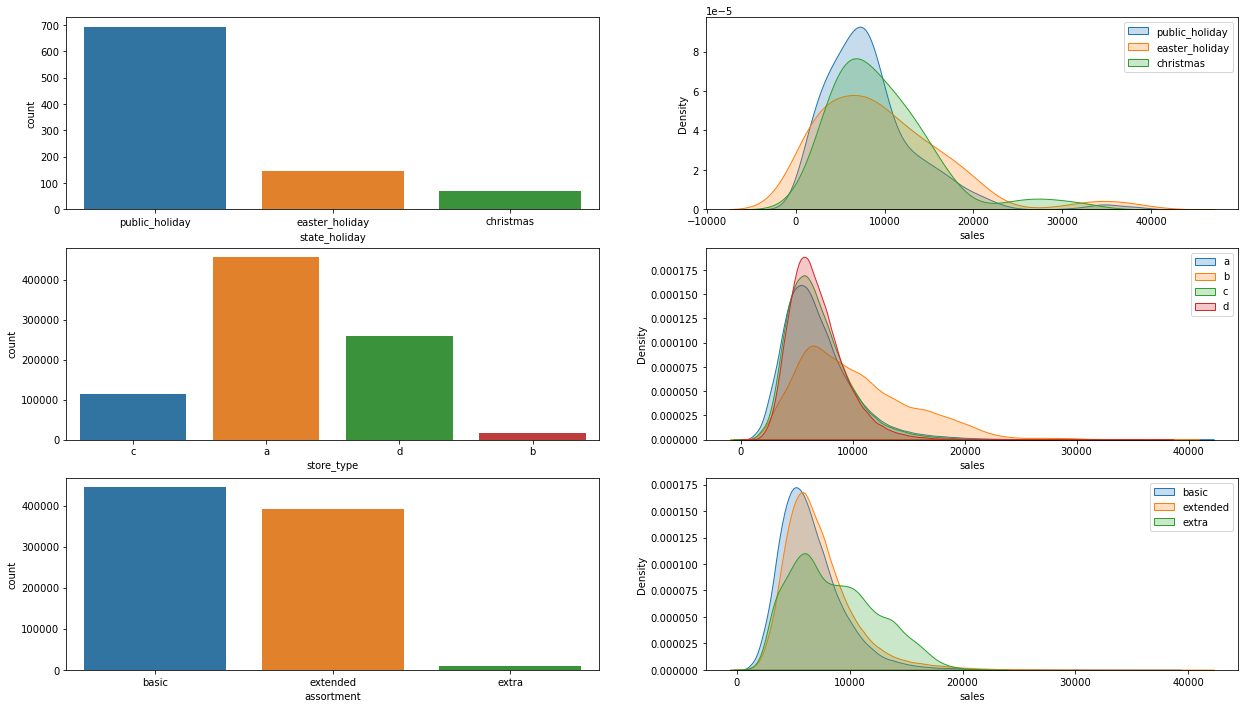

In [99]:
fig = plt.figure(figsize=(21,12))
specs = gridspec.GridSpec(ncols=2, nrows=3, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  # First row First Column
ax2 = fig.add_subplot(specs[0,1])  # First row Second Column
ax3 = fig.add_subplot(specs[1,0])  # Second row First Column
ax4 = fig.add_subplot(specs[1,1])  # Second row Second Column
ax5 = fig.add_subplot(specs[2,0])  # Third row First Column
ax6 = fig.add_subplot(specs[2,1])  # Third row Second Column

a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(x=a['state_holiday'], ax=ax1)

# plots de densidade de distribuição
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade= True, ax=ax2)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade= True, ax=ax2)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade= True, ax=ax2)
ax2.legend()

sns.countplot(x=df4['store_type'], ax=ax3)

# plots de densidade de distribuição
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade= True, ax=ax4)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade= True, ax=ax4)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade= True, ax=ax4)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade= True, ax=ax4)
ax4.legend()

sns.countplot(x=df4['assortment'], ax=ax5)

# plots de densidade de distribuição
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade= True, ax=ax6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade= True, ax=ax6)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade= True, ax=ax6)
ax6.legend()

# Validação da Hipóteses

### **H1.** Lojas com maior sortimento deveriam vender mais, na média.
**Verdadeira** lojas com maior sortimento vendem mais na média 

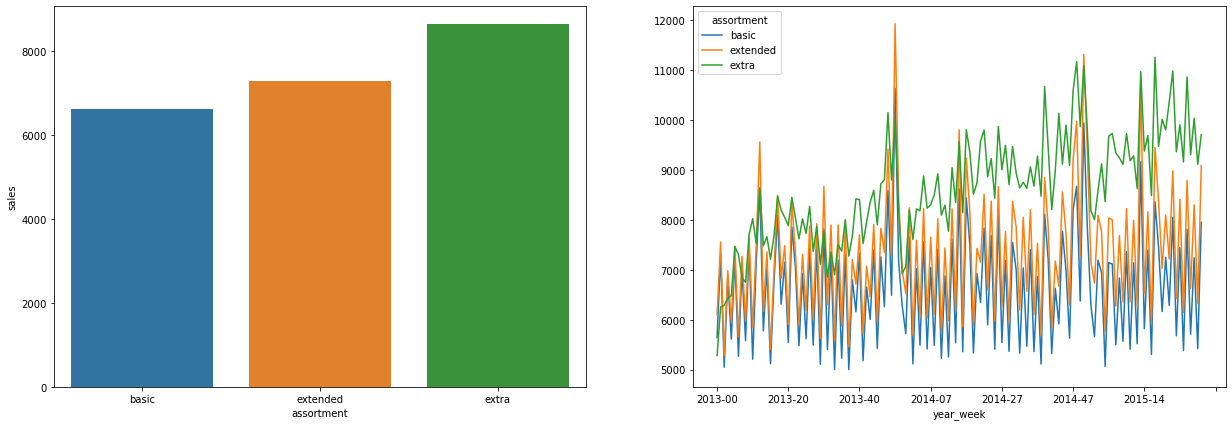

In [100]:
fig = plt.figure(figsize=(21,7))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  
ax2 = fig.add_subplot(specs[0,1])   


aux1 = df4[['assortment', 'sales']].groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1, ax=ax1); 

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).mean().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot(ax=ax2)

fig.savefig('../img/H1.png')

### **H10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**FALSA** Lojas vendem menos depois do dia 10 de cada mes.

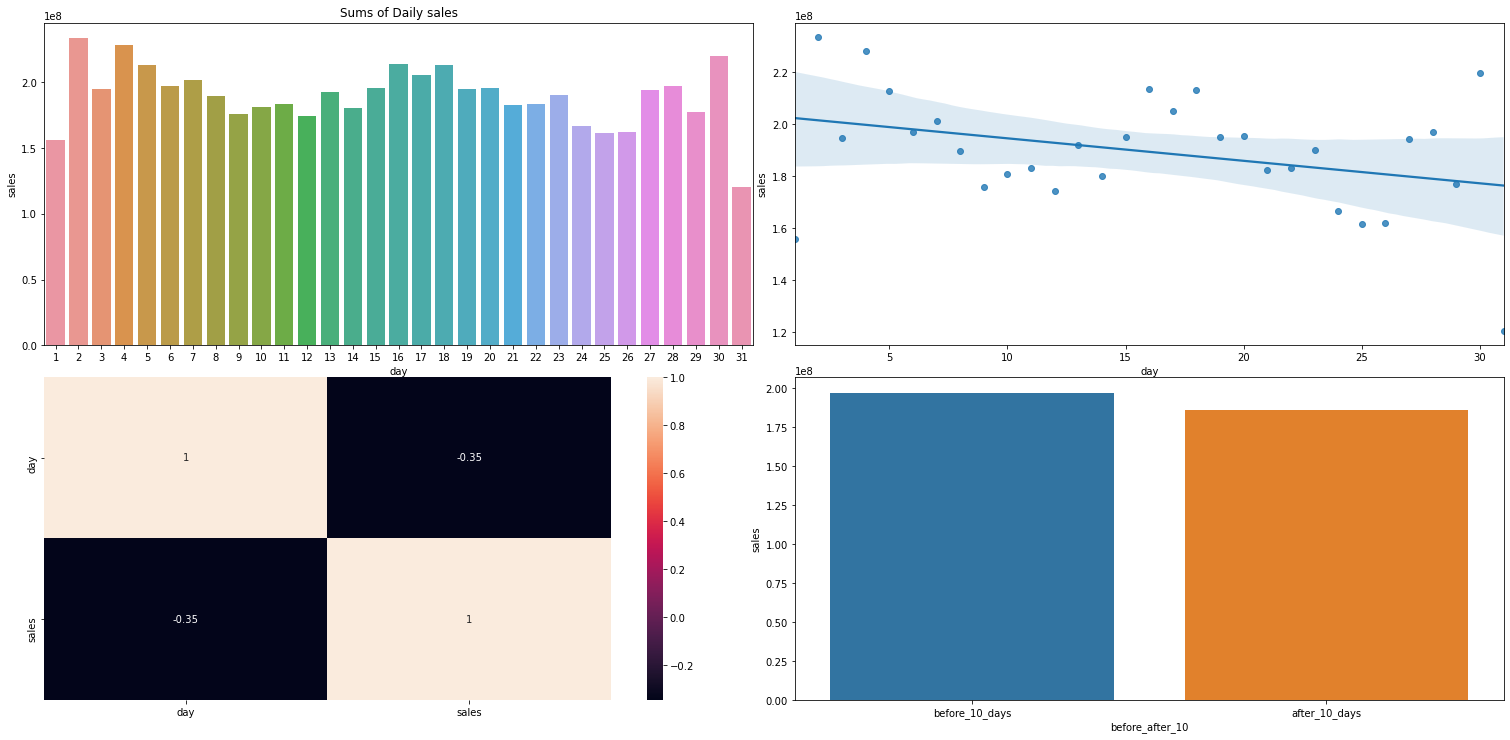

In [109]:
fig, ax = plt.subplots(2, 2, figsize=(21,10))
fig.tight_layout()

aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()
sns.barplot(x='day', y='sales', data=aux1, ax=ax[0,0]).set(title='Sums of Daily sales')
sns.regplot(x='day', y='sales', data=aux1, ax=ax[0,1])
sns.heatmap(aux1.corr(method='pearson'), annot=True, ax=ax[1,0])

aux1['before_after_10'] = aux1['day'].apply(lambda x: 'before_10_days' if x <=10 else 'after_10_days')
aux2 = aux1[['before_after_10', 'sales']].groupby( 'before_after_10' ).mean().reset_index()
sns.barplot(x='before_after_10', y='sales', data=aux2, ax=ax[1,1], order=['before_10_days', 'after_10_days'])

fig.savefig('../img/H10.png')

### **H12.** Lojas deveriam vender menos durante os feriados escolares.

**FALSA** Lojas vendem mais, na média, nos deriados escolares.

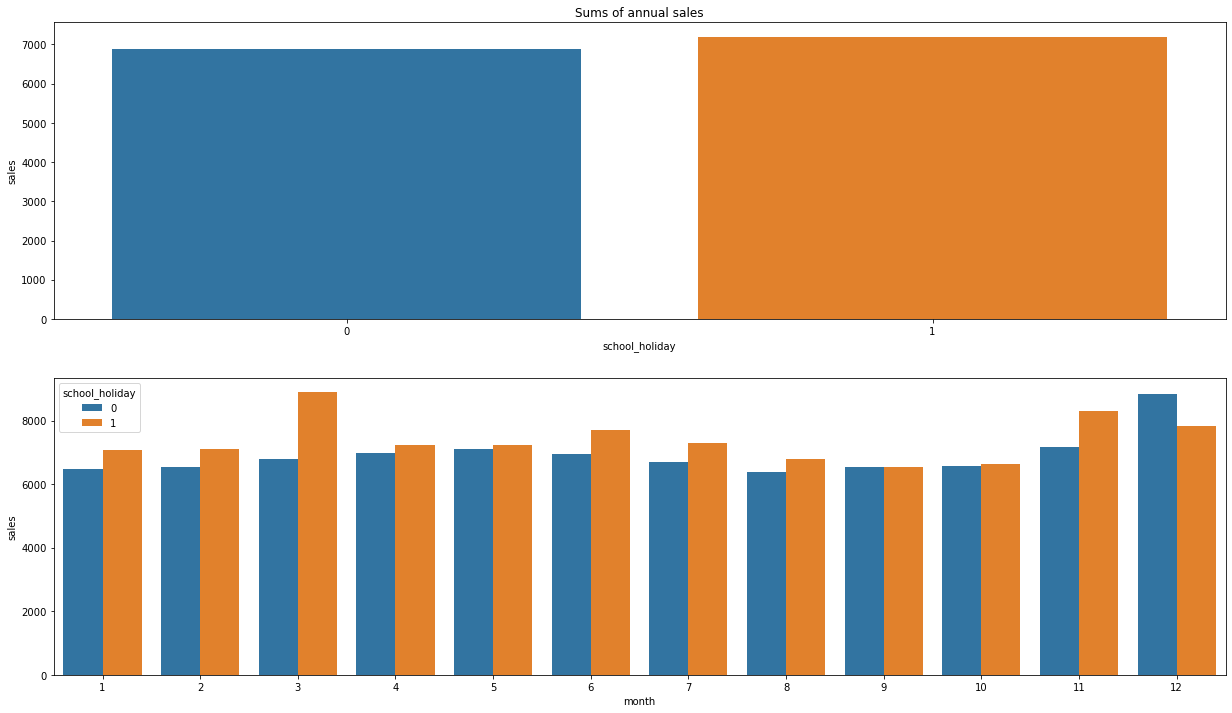

In [111]:
fig = plt.figure(figsize=(21,12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure = fig)

ax1 = fig.add_subplot(specs[0])
ax2 = fig.add_subplot(specs[1])

aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').mean().reset_index()
sns.barplot(x='school_holiday', y='sales', data=aux1, ax=ax1).set(title='Sums of annual sales')
# sns.regplot(x='school_holiday', y='sales', data=aux1, ax=ax2)
# sns.heatmap(aux1.corr(method='pearson'), annot=True, ax=ax3)

aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month','school_holiday'] ).mean().reset_index()
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 , ax=ax2);

fig.savefig('../img/H12.png')

# Resumo das Hipóteses

In [112]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H1', 'Verdadeira', 'Alta'],  
      ['H2', 'Falsa', 'Media'],  
      ['H3', 'Verdadeira', 'Media'],
      ['H4', 'Verdadeira', 'Media'],
      ['H5', '-', '-'],
      ['H6', 'Falsa', 'Baixa'],
      ['H7', 'Falsa', 'Media'],
      ['H8', 'Falsa', 'Alta'],
      ['H9', 'Verdadeira', 'Media'],
      ['H10', 'Falsa', 'Media'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Baixa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Verdadeira   Alta
H2           Falsa        Media
H3           Verdadeira   Media
H4           Verdadeira   Media
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Verdadeira   Media
H10          Falsa        Media
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


# Análise Multivariada

# Atributos Numéricos

<AxesSubplot:>

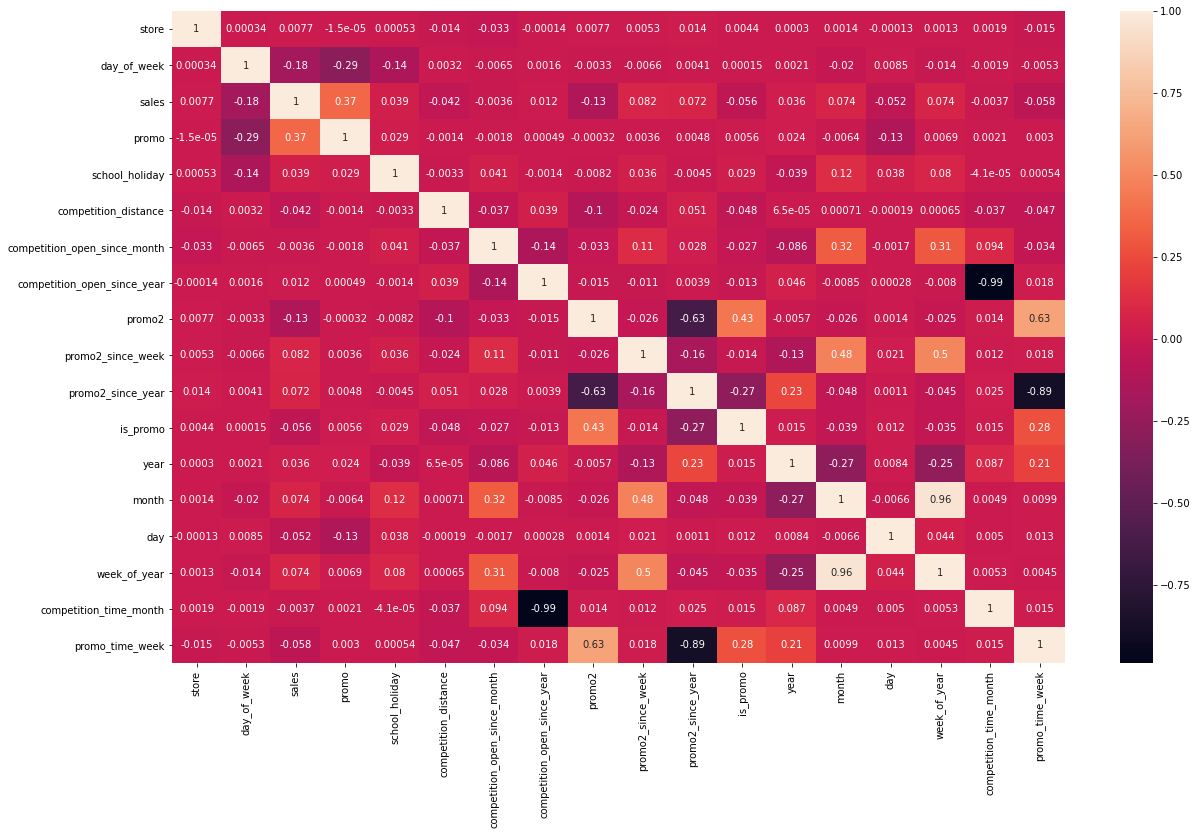

In [113]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()

# creating mask
mask = np.triu(np.ones_like(num_attributes.corr()))
 
# plotting a triangle correlation heatmap
sns.heatmap(num_attributes.corr(method='pearson'), annot=True, ax=ax)

# Atributos Categóricos

<AxesSubplot:>

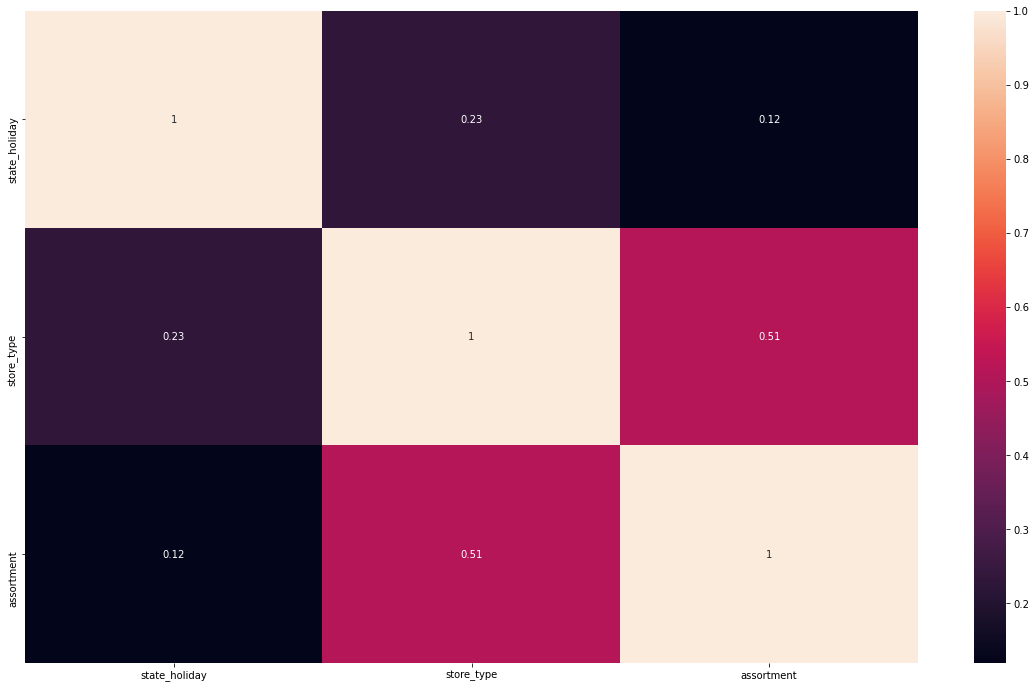

In [115]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()

# only categorical data
a = a.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'] )
a8 = cramer_v(a['assortment'], a['store_type'] )
a9 = cramer_v(a['assortment'], a['assortment'] )

d = pd.DataFrame({'state_holiday': [a1, a2, a3],
              'store_type': [a4, a5, a6],
              'assortment': [a7, a8, a9]})

d = d.set_index( d.columns )

sns.heatmap(d, annot = True, ax=ax)

# Machine Learning Modelling

## Compare Model's Performance

In [ ]:
modeling_result = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modeling_result.sort_values('RMSE CV')

Model Name              MAE CV        MAPE CV  \
0  Random Forest Regressor    837.8 +/- 214.98  0.12 +/- 0.02   
0        Linear Regression  2078.09 +/- 295.43   0.3 +/- 0.02   
0                    Lasso  2117.99 +/- 342.74  0.29 +/- 0.01   
0            XGB Regressor   7049.73 +/- 589.3   0.95 +/- 0.0   

              RMSE CV  
0   1256.26 +/- 310.6  
0  2946.66 +/- 468.06  
0  3058.17 +/- 506.07  
0  7718.99 +/- 689.76

# Modelo Final Após Fine Tuning

In [81]:
# model
xgb_model_tuned = xgb.XGBRegressor (objective='reg:squarederror',
                                    n_estimators = param_tuned['n_estimators'],
                                    eta = param_tuned['eta'],
                                    max_depth = param_tuned['max_depth'],
                                    subsample = param_tuned['subsample'],
                                    colsample_bytree = param_tuned['colsample_bytree'],
                                    min_child_weight = param_tuned['min_child_weight']).fit(x_train, y_train)

# prediction
yhat_xgb_tuned = xgb_model_tuned.predict(x_test)


# performance
xgb_result_tuned = ml_error('', np.expm1(y_test), np.expm1(yhat_xgb_tuned))

pickle.dump(xgb_model_tuned, open('../model/model_rossmann.pkl', 'wb'))

xgb_result_tuned

Model Name         MAE      MAPE         RMSE
0             770.787235  0.115702  1110.182221

# <font color='blue'>4. Conclusão & Demonstração</font>

#  Tradução e Interpretação do Erro

# Business Performance

In [143]:
df92.sort_values('MAPE', ascending=False)

store  predictions  worst_scenario  best_scenario      MAE  MAPE
291     292   107,538.62      104,184.04     110,893.19 3,354.58  0.59
908     909   223,920.86      216,105.41     231,736.31 7,815.45  0.52
875     876   183,380.95      178,911.92     187,849.98 4,469.03  0.36
169     170   198,405.81      197,136.75     199,674.88 1,269.07  0.31
955     956   140,066.38      139,308.38     140,824.37   758.00  0.30
...     ...          ...             ...            ...      ...   ...
1066   1067   225,941.30      225,575.85     226,306.74   365.45  0.06
258     259   565,427.06      564,729.00     566,125.13   698.07  0.06
947     948   343,630.12      343,130.24     344,130.01   499.88  0.06
666     667   318,492.59      318,003.56     318,981.63   489.04  0.06
1096   1097   448,442.91      447,844.57     449,041.24   598.33  0.05

[1115 rows x 6 columns]

<AxesSubplot:xlabel='store', ylabel='MAPE'>

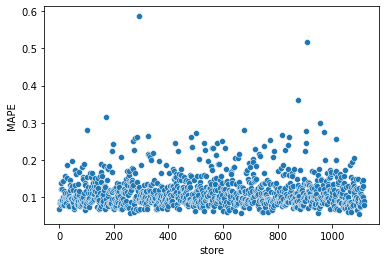

In [145]:
sns.scatterplot(x='store', y='MAPE', data=df92)

# Total Performance

In [146]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis=0).reset_index().rename(columns={'index': 'Scenario', 0: 'Values'})
df93['Values'] = df93['Values'].map('${:,.2f}'.format)
df93

Scenario           Values
0     predictions  $286,746,880.00
1  worst_scenario  $285,883,857.25
2   best_scenario  $287,609,874.99

# Machine Learning Performance

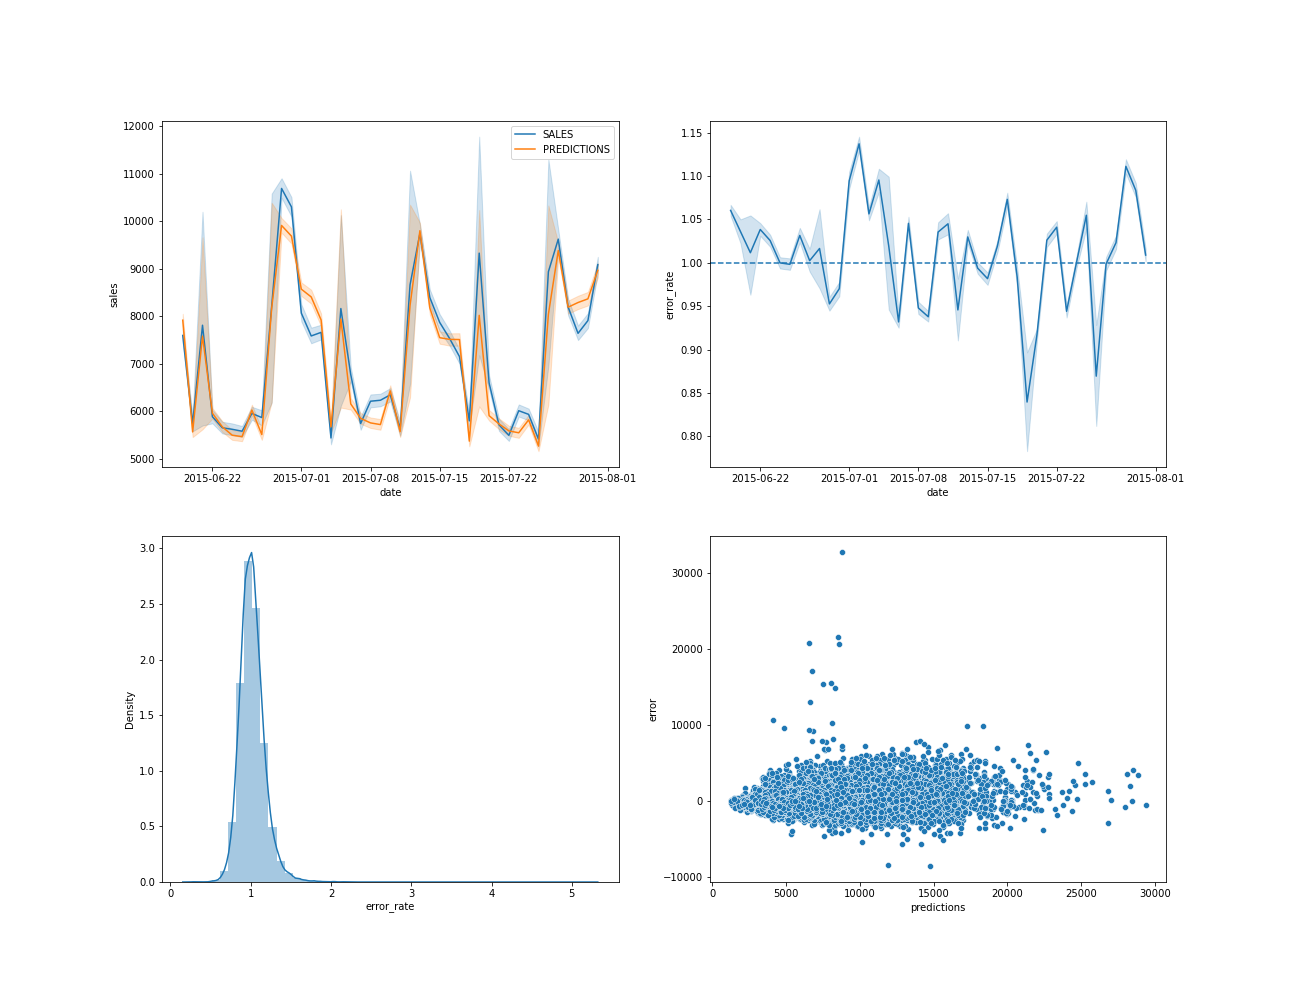

In [6]:
with open('../img/overall_performance.png','rb') as f:
    display(Image(data=f.read(), format='png'))

# Demonstração - Telegram

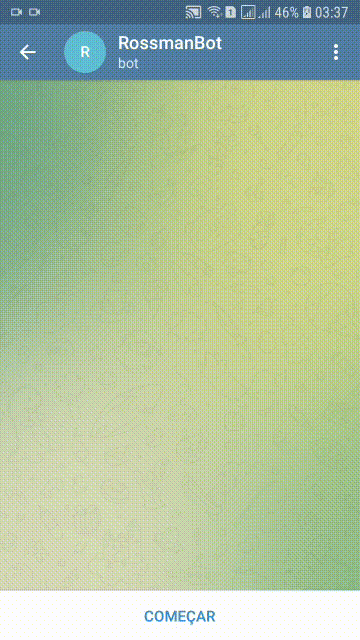

In [4]:
from IPython.display import Image

with open('../img/rossmann_bot.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

# <font color='blue'>5. Próximos Passos</font>

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Usabilidade
- Melhorar a performance do modelo (MAPE) em 5%


# <font color='blue'> Q & A </font>

# <font color='blue'> Muito Obrigado! </font>